In [15]:
# Importar Pandas e Matplotlib

import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# Carregar arquivo .csv

df = pd.read_csv('EMTI_Relatorio_Status.csv', sep=',', encoding='latin-1')

In [17]:
# Exibir linhas e colunas

print(df.head())
print(df.columns)

   UF  ANO_EXECUCAO  TOTAL_MATRICULA  TOTAL_ESCOLA_ADESAO       TOTAL_VERBA
0  AC          2017            3.167                    7  R$ 16.959.183,19
1  AL          2017            2.457                   19  R$ 11.701.815,07
2  AM          2017            4.853                   17  R$ 26.014.015,54
3  AP          2017            1.246                    8   R$ 4.185.536,25
4  BA          2017            2.505                   17  R$ 16.136.761,09
Index(['UF', 'ANO_EXECUCAO', 'TOTAL_MATRICULA', 'TOTAL_ESCOLA_ADESAO',
       'TOTAL_VERBA'],
      dtype='object')


In [18]:
# Verificando se TOTAL_MATRICULA é uma string

df['TOTAL_MATRICULA'] = df['TOTAL_MATRICULA'].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)

In [19]:
# Agrupar os dados por ano e somar o total de matrículas

df_grouped = df.groupby('ANO_EXECUCAO')['TOTAL_MATRICULA'].apply(lambda x: x.str.replace(',', '').astype(float).sum()).reset_index()

In [21]:
max_value = df_grouped['TOTAL_MATRICULA'].max()
min_value = df_grouped['TOTAL_MATRICULA'].min()
mean_value = df_grouped['TOTAL_MATRICULA'].mean()

print(f"Valor máximo: {max_value}")
print(f"Valor mínimo: {min_value}")
print(f"Valor médio: {mean_value}")

Valor máximo: 1.4571500000023728e+17
Valor mínimo: 4.804000000027846e+16
Valor médio: 8.290114285735458e+16


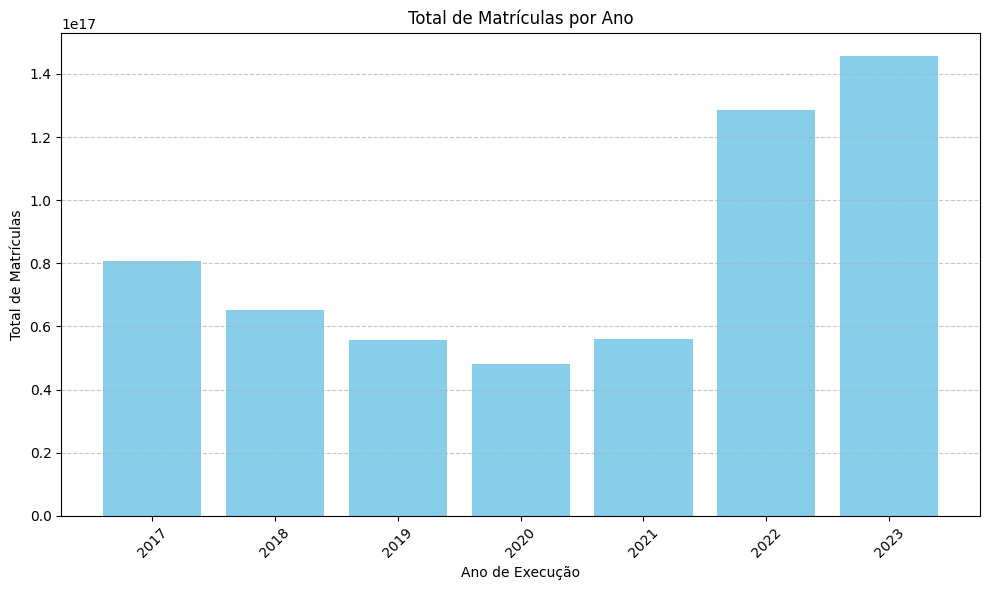

In [22]:
# Criar o gráfico

plt.figure(figsize=(10, 6))
plt.bar(df_grouped['ANO_EXECUCAO'].astype(str), df_grouped['TOTAL_MATRICULA'], color='skyblue')
plt.title('Total de Matrículas por Ano')
plt.xlabel('Ano de Execução')
plt.ylabel('Total de Matrículas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()